# Log分析库用户手册

Log分析库主要用于分析调度器的EI Log，主要具备如下功能：
1. **信息呈现**：主要以表格或者图形形式，呈现相关信息
2. **问题发现**：根据Log中的调度信息，发现是否存在某些问题，如果有，输出相关上下文
3. **问题定位**：根据问题上下文，推断可能的原因并输出定位结果。

## git库地址

Log分析git库地址[git@github.xa.com:xa/rtl2.git](git@github.xa.com:xa/rtl2.git)

## 配置图片为嵌入显示|

In [1]:
matplotlib inline

In [2]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


## 接口类简介

为了方便使用，**强烈建议**线切换到库的根目录

In [3]:
cd E:\rtl2master\loganalysis

E:\rtl2master\loganalysis


使用前，首先需要导入LteLog类

In [4]:
from loganalysis import LteLog

所有的接口函数注释都非常清楚，可以使用help()或者？来获取帮助信息，比如对于Log类，使用help(Log)获取使用帮助

In [6]:
help(LteLog)

Help on class LteLog in module loganalysis.lte.ltelog:

class LteLog(loganalysis.log.Log)
 |  LTE调度模块Log分析接口类
 |  
 |  主要提供如下3类功能：
 |  a) 信息呈现
 |  b）问题发现
 |  c）问题定位
 |  要求所有文件命名符合EI命名格式：子系统_时间.csv
 |  
 |  Method resolution order:
 |      LteLog
 |      loganalysis.log.Log
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, directory, time_interval=None, product_type='Micro')
 |      初始化Log实例,把所有Log按照类型分类
 |      
 |      Args:
 |          directory: Log所在目录
 |          time_interval: 时间范围[start, end],格式为yyyymmddhhmmss
 |          product_type: 产品类型['Macro', 'Micro']，默认为micro
 |  
 |  get_cell(self, cellid=None)
 |      获取小区实例
 |      Args：
 |          cellid：如果想查看Log中的所有小区id，那么不用赋值
 |      Returns:
 |          如果cellid不为None，返回对应的小区实例，否则返回Log中的所有小区Id
 |  
 |  get_dlphy_logfile(self, cellid)
 |      根据CellId选择DLPHY文件
 |      Args：
 |          cellid: 小区ID
 |      Returns:
 |          文件名(文件类型.csv）
 |  
 |  get_schd_logfile(self, filetype, cellid, uegid=None)


通过上述帮助文档可以看出，实例化Log类需要输入两个参数：待分析log文件所在目录，产品类型（默认小站）

In [7]:
log = LteLog(r'E:\data\all')

通过describle方法查看所有log文件信息

In [8]:
log.directory

'E:\\data\\all'

In [8]:
log.get_cell()

'所有CellId：{222}. 请使用get_cell(cellid)获取对应的Cell实例'

In [9]:
cell = log.get_cell(222)

In [10]:
cell.describle()

TotUeNum                   7
dlschd_log_lines      103527
ulschd_log_lines       87763
dlphy_log_lines        23123
pdsch_mismatch_cnt         1
pdcch_mismatch_cnt         1
Name: 小区整体信息描述, dtype: int64

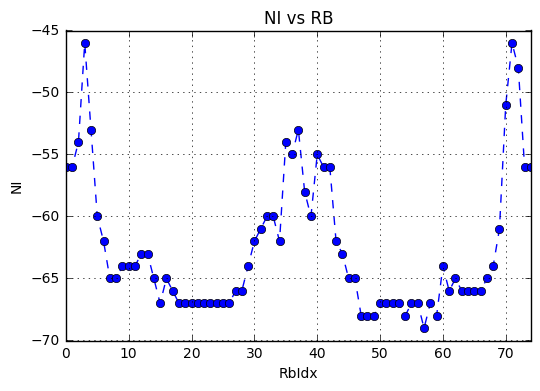

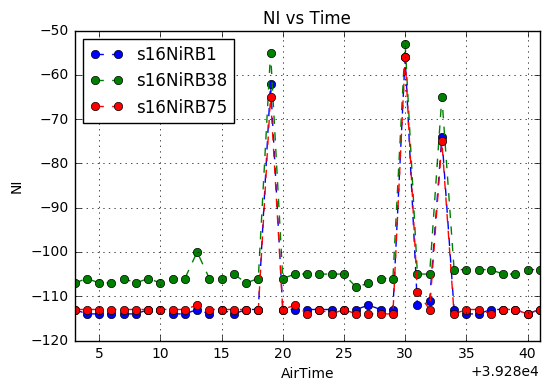

In [11]:
cell.ni.show()

In [12]:
cell.cellid

222

### 问题发现功能, 均以find_开头

In [28]:
cell.find_pdcch_mismatch()

,AirTime,UEGID
0,62873513.0,49.0


In [16]:
cell.ul.find_dci0lost()

,UEGID,CRCI.u32DemTime,CRCI.u8CrcHarqId,CRCI.u8DciLostFlag
19541,50.0,62870034.0,0.0,1.0
30309,45.0,62879399.0,1.0,1.0
49878,49.0,62896290.0,0.0,1.0
49879,50.0,62896290.0,0.0,1.0
49897,49.0,62896306.0,0.0,1.0
49898,50.0,62896306.0,0.0,1.0
49918,50.0,62896322.0,0.0,1.0
49919,49.0,62896322.0,0.0,1.0
49939,50.0,62896338.0,0.0,1.0
49940,49.0,62896338.0,0.0,1.0


In [17]:
cell.ul.find_harqfail()

,UEGID,CRCI.u32DemTime,CRCI.u8CrcHarqId,CRCI.b8IsHarqFail
30362,49.0,62879447.0,1.0,1.0
30363,50.0,62879447.0,1.0,1.0
49897,49.0,62896306.0,0.0,1.0
49898,50.0,62896306.0,0.0,1.0
49939,50.0,62896338.0,0.0,1.0
49940,49.0,62896338.0,0.0,1.0


In [18]:
cell.ul.find_selfmaintain()

,UEGID,CRCI.u32DemTime,CRCI.u8CrcHarqId,CRCI.b8IsSelfMainTain


### 信息呈现功能，都以show_开头

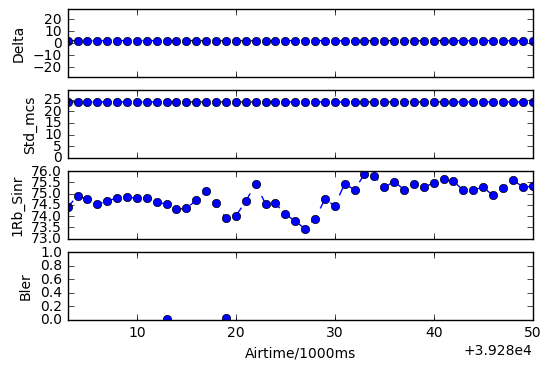

In [15]:
cell.ul.show_amc()

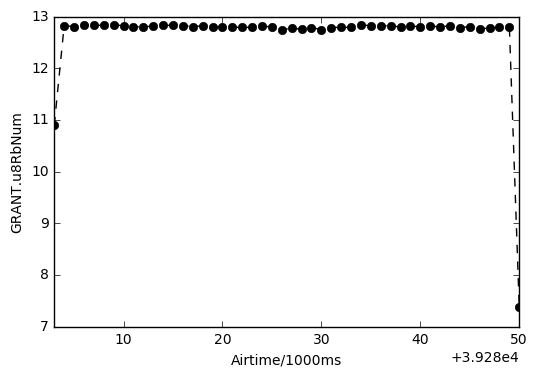

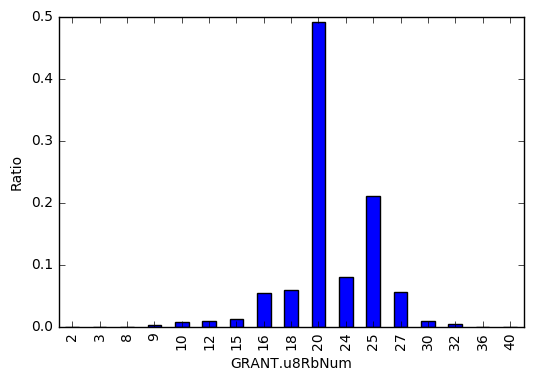

In [19]:
cell.ul.show_schd_rbnum()

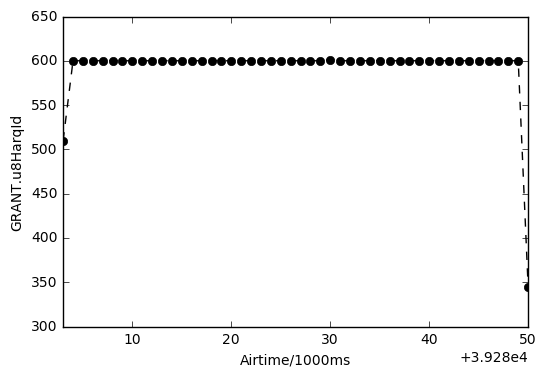

In [21]:
cell.ul.show_schd_uecnt()

In [22]:
cell.get_ue()

'所有UEGID：{678, 551, 45, 557, 49, 50, 51}. 请使用get_ue(uegid)获取对应的UE实例'

In [23]:
ue = cell.get_ue(45)

In [24]:
ue.uegid

45

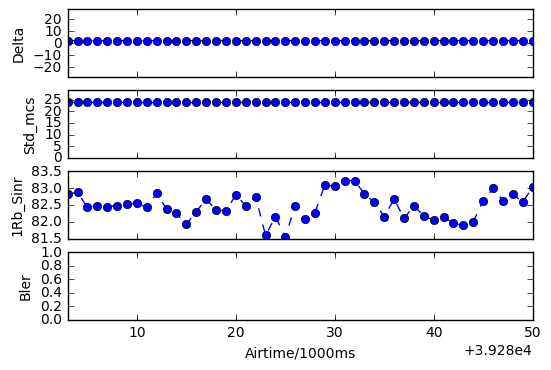

In [26]:
ue.ul.show_amc()

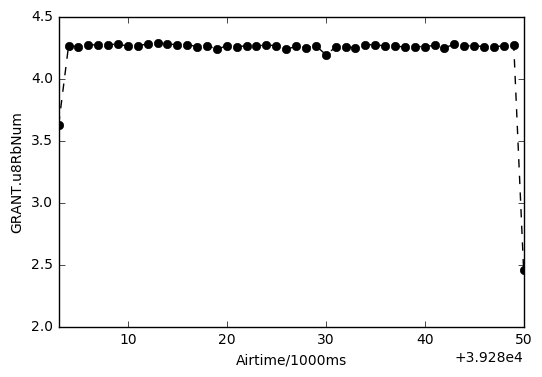

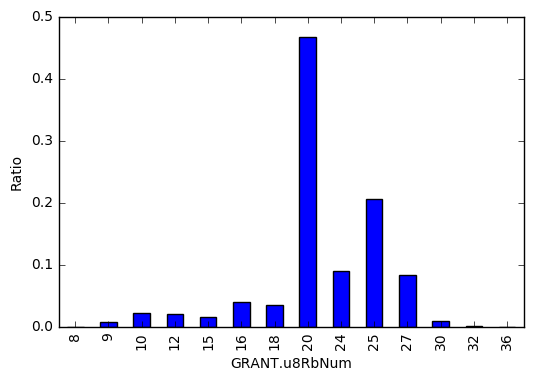

In [27]:
ue.ul.show_schd_rbnum()